In [81]:
import numpy
from matplotlib import pyplot
%matplotlib inline
import math

In [82]:
N = 50                                # Number of points in each direction
x_start, x_end = -3.0, 3.0            # x-direction boundaries
y_start, y_end = -5.0, 5.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y) 

In [83]:
gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0

In [84]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [85]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [86]:
strength_sink = -5.0        # strength of the sink
x_sink, y_sink = 2.0, 0.0   # location of the sink

In [87]:
def get_velocity(strength, xs, ys, X, Y):
    """Returns the velocity field generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [88]:
def get_stream_function(strength, xs, ys, X, Y):
    """Returns the stream-function generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink.
    xs, ys -- coordinates of the source/sink.
    X, Y -- mesh grid.
    """
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [89]:
strength_source = 5.0
x_source, y_source = -2.0, 0.0

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)
# computes the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)
psi_sink = get_stream_function(strength_source, x_sink, y_sink, X, Y)

In [90]:
# computes the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# computes the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

In [91]:
a = (v**2+u**2)**0.5
numpy.min(a)

0.00039640178905209883

In [92]:
numpy.shape(a)

(50, 50)

In [93]:
v

array([[-0.00324071, -0.00404276, -0.00476333, ...,  0.00476333,
         0.00404276,  0.00324071],
       [-0.00490373, -0.0057851 , -0.00657243, ...,  0.00657243,
         0.0057851 ,  0.00490373],
       [-0.00681246, -0.00778937, -0.00865739, ...,  0.00865739,
         0.00778937,  0.00681246],
       ..., 
       [ 0.16551792,  0.16374794,  0.16157096, ..., -0.16157096,
        -0.16374794, -0.16551792],
       [ 0.1541076 ,  0.15219171,  0.14990939, ..., -0.14990939,
        -0.15219171, -0.1541076 ],
       [ 0.14367154,  0.14165464,  0.13930774, ..., -0.13930774,
        -0.14165464, -0.14367154]])

In [94]:
numpy.where(a == numpy.min(a))

(array([15]), array([24]))

In [95]:
x_stag = x[ numpy.where(a == numpy.min(a))[1][0] ]
y_stag = y[ numpy.where(a == numpy.min(a))[0][0] ]
print(x_stag, y_stag)

-0.0612244897959 -1.9387755102


In [96]:
y[24]

-0.1020408163265305

In [97]:
x[15]

-1.1632653061224489

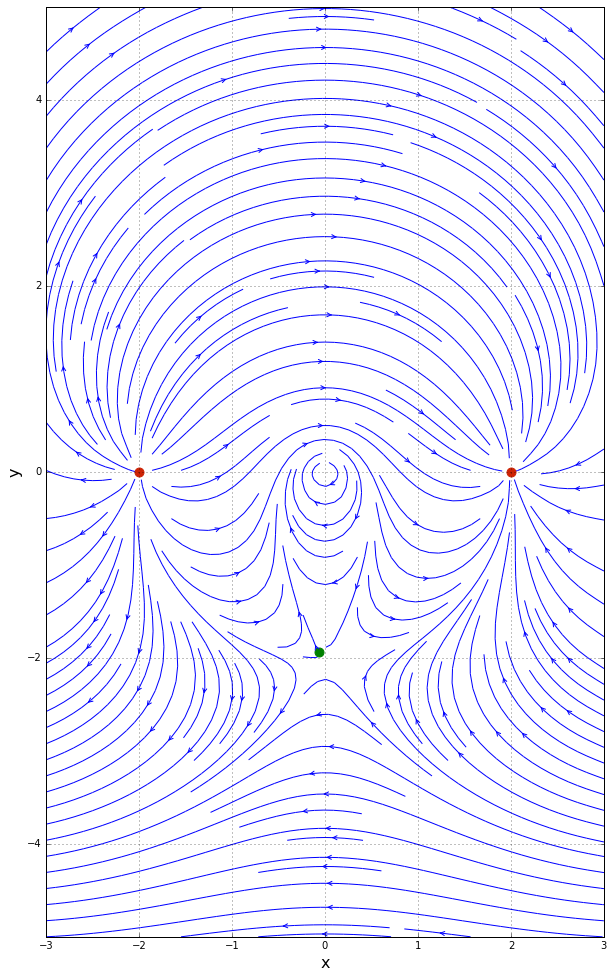

In [98]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')
pyplot.scatter(x_sink, y_sink, color='#CD2305', s=80, marker='o')

# adding the stagnation point to the figure
pyplot.scatter(x_stag, y_stag, color='g', s=80, marker='o')